<a href="https://colab.research.google.com/github/dionysiadimi/matzaris/blob/main/Employee_turnover_Dimitrakopoulou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df1=pd.read_csv('HR_comma_sep.csv')
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df1.shape

(14999, 10)

In [5]:
df1.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]>

In [6]:
# So there are no null values!!!!

In [7]:
#Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

In [8]:
df1num=df1.select_dtypes(exclude='object')
df1num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [9]:
df1num['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [10]:
df1cat=df1.select_dtypes(include='object')
df1cat

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


<Axes: >

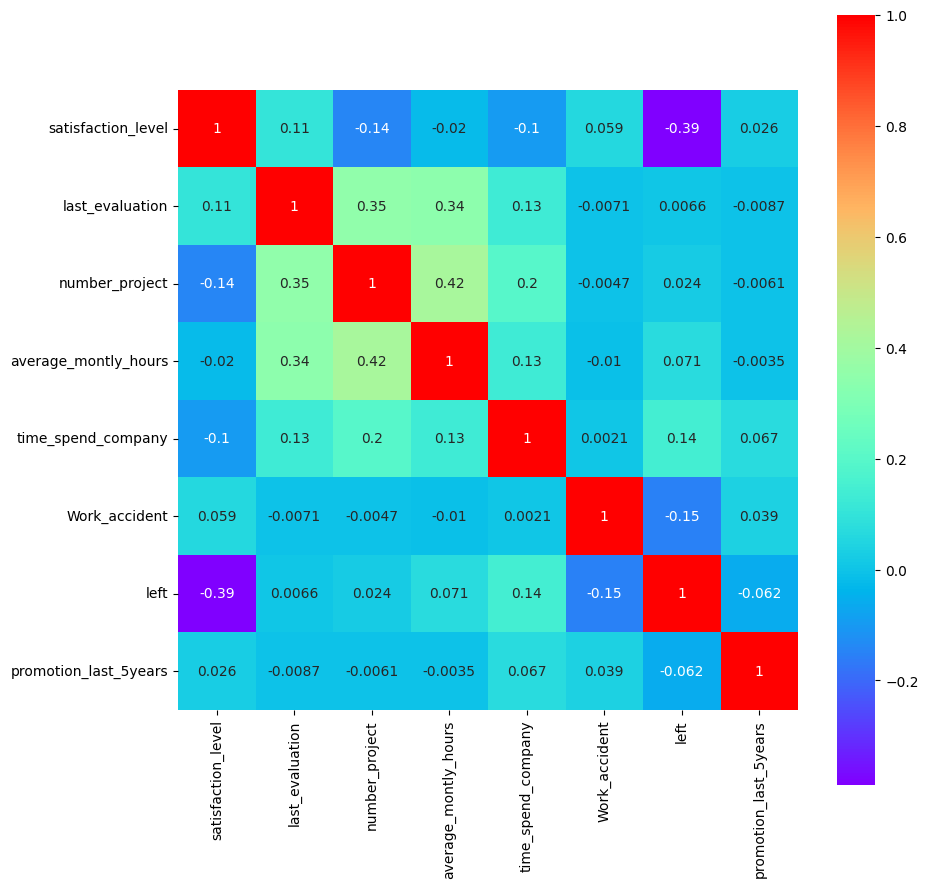

In [11]:
cordf1num=df1num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cordf1num, vmax=1, square=True,annot=True,cmap='rainbow')

In [12]:
#2.2.	Draw the distribution plot of Employee Satisfaction (use column satisfaction_level)


<Axes: ylabel='Frequency'>

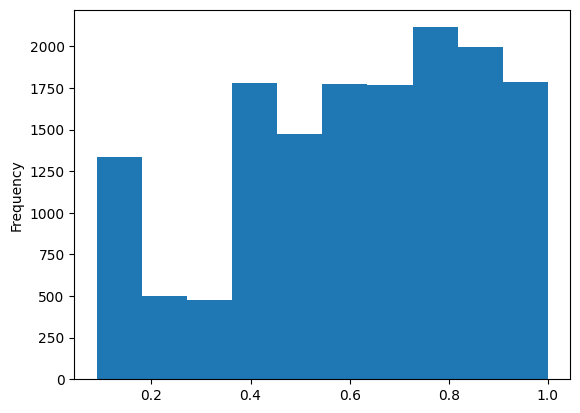

In [13]:
df1num['satisfaction_level'].plot(kind='hist')

In [14]:
#Distribution plot of Employee Evaluation (use column last_evaluation)

<Axes: ylabel='Frequency'>

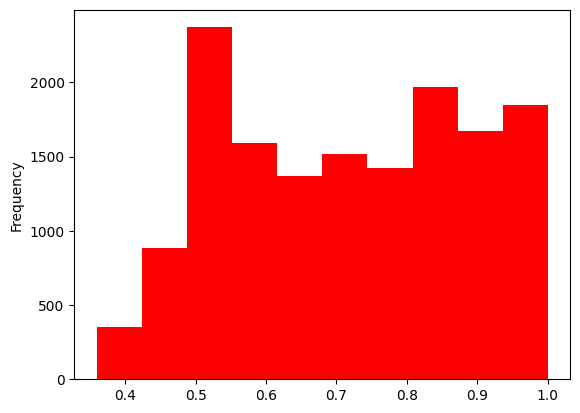

In [15]:
df1num['last_evaluation'].plot(kind='hist', color='red')

In [16]:
# Distribution plot of Employee Average Monthly Hours (use column average_montly_hours

<Axes: ylabel='Frequency'>

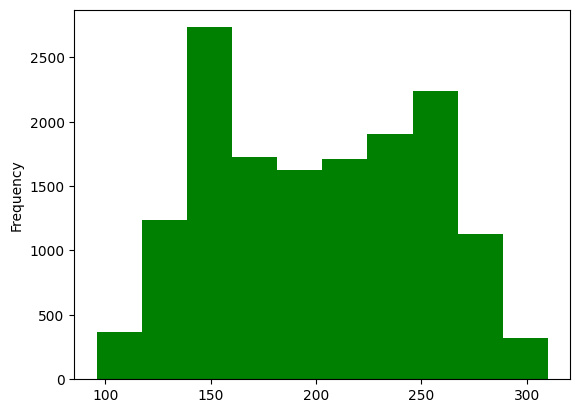

In [17]:
df1num['average_montly_hours'].plot(kind='hist', color='green')

In [18]:
#2.3.	Draw the bar plot of Employee Project Count of both employees who left
#and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

<Axes: xlabel='number_project', ylabel='count'>

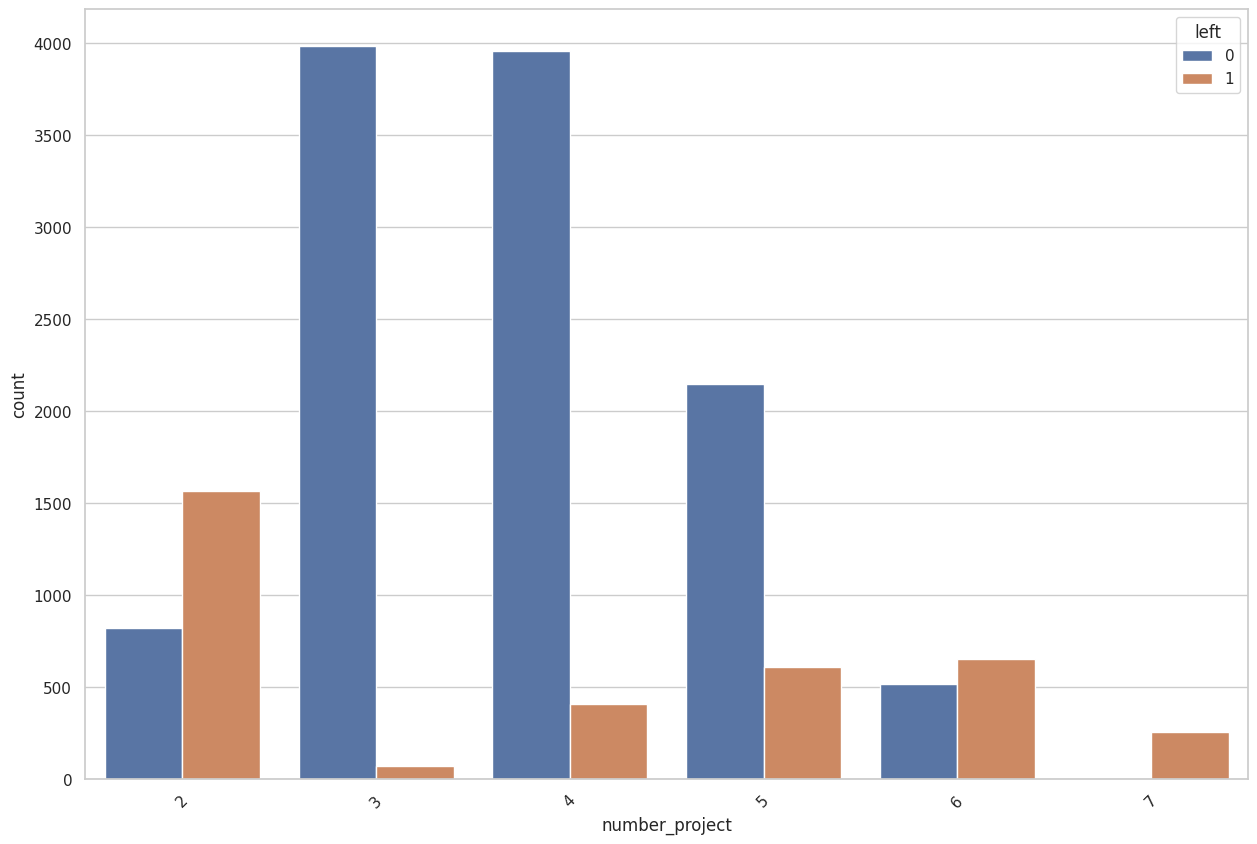

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=df1num, x="number_project", hue="left")

In [20]:
#Perform clustering of Employees who left based on their satisfaction and evaluation.
#3.1.	Choose columns satisfaction_level, last_evaluation and left
#3.2.	Do KMeans clustering of employees who left the company into 3 clusters.
#3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.



In [21]:
cluster_details=df1[['satisfaction_level','last_evaluation', 'left']].copy()
cluster_details



,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [22]:


scaled_df=StandardScaler().fit_transform(cluster_details)
scaled_df


array([[-0.93649469, -1.08727529,  1.788917  ],
       [ 0.75281433,  0.84070693,  1.788917  ],
       [-2.02247906,  0.95755433,  1.788917  ],
       ...,
       [-0.97671633, -1.08727529,  1.788917  ],
       [-2.02247906,  1.42494396,  1.788917  ],
       [-0.97671633, -1.14569899,  1.788917  ]])

In [23]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

In [24]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
cluster_details['cluster']=kmeans.labels_
cluster_details

,satisfaction_level,last_evaluation,left,cluster
0,0.38,0.53,1,0
1,0.80,0.86,1,1
2,0.11,0.88,1,0
3,0.72,0.87,1,1
4,0.37,0.52,1,0
...,...,...,...,...
14994,0.40,0.57,1,0
14995,0.37,0.48,1,0
14996,0.37,0.53,1,0
14997,0.11,0.96,1,0


In [26]:
cluster_details['cluster'].value_counts()

2    6300
1    6025
0    2674
Name: cluster, dtype: int64

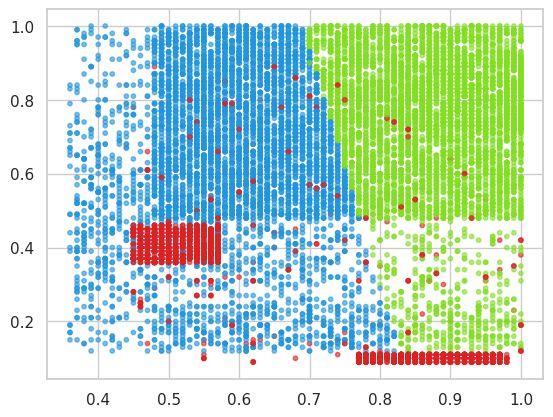

In [27]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
cluster_details['cen_x'] = cluster_details.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
cluster_details['cen_y'] = cluster_details.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
cluster_details['c'] = cluster_details.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(cluster_details.last_evaluation, cluster_details.satisfaction_level, c=cluster_details.c, alpha = 0.6, s=10)

In [28]:
# In order to write and understand the code above, I used sources from internet related to k-means
#however the grph is not so informative, so below is the alternative

In [29]:
ab=cluster_details.groupby('cluster')['satisfaction_level'].sum().sort_values(ascending=False)
ab

cluster
1    4373.89
2    3979.92
0     838.08
Name: satisfaction_level, dtype: float64

In [30]:
cd=cluster_details.groupby('cluster')['last_evaluation'].sum().sort_values(ascending=False)
cd

cluster
1    5271.11
2    3735.27
0    1734.43
Name: last_evaluation, dtype: float64

In [31]:
#it looks that both last evaluation and satisfaction level are categorized in the same clusters!! Cluster one has the higher last evaluation and satisfaction level

In [32]:
#4.	Handle the left Class Imbalance using SMOTE technique.
#4.1.	Pre-Process the data by converting categorical columns to numerical columns by
#	Separating categorical variables and numeric variables.
#	Applying get_dummies() to the categorical variables.
#	Combining categorical variables and numeric variables.
#4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
#4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.


In [33]:
#categorical values
df1cat

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [34]:
dfa=pd.get_dummies(df1cat)

In [35]:
#combining categorical and numerical variables

In [36]:
df2=pd.concat([df1num,dfa])
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
df3=df2.fillna(0)
df3

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14995,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14996,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14997,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
#4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [39]:
from sklearn.model_selection import train_test_split
y=df3['left']
X=df3.drop(['left'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=123)

In [41]:
#4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.


In [42]:
df3['left'].value_counts()

0.0    26427
1.0     3571
Name: left, dtype: int64

In [43]:
#Indeed highly imbalanced data between those who stayed and left!!

In [44]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [46]:
#5.	Perform 5-Fold cross-validation model training and evaluate performance.
#5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
#5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
#5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.


In [47]:
#5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)

In [50]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[4361  960]
 [  37  642]]


In [51]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      5321
         1.0       0.40      0.95      0.56       679

    accuracy                           0.83      6000
   macro avg       0.70      0.88      0.73      6000
weighted avg       0.92      0.83      0.86      6000



<Axes: >

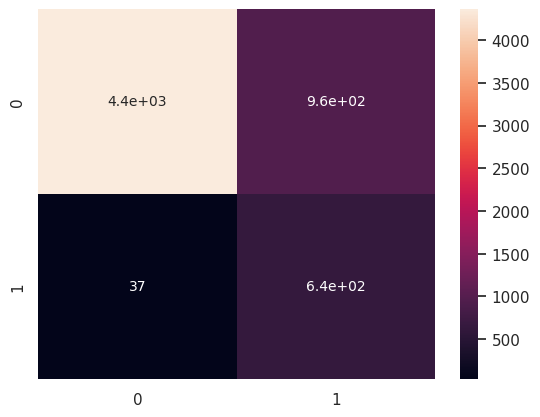

In [52]:

  ax=plt.axes()
  sns.heatmap(matrix, annot=True,
                        annot_kws={'size':10},
                        ax=ax
                        )

In [53]:
#5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model1 = RandomForestClassifier()
results1 = cross_val_score(model1, X, y, cv=kfold)
model1.fit(X_train, y_train)
predicted1 = model1.predict(X_test)
matrix1 = confusion_matrix(y_test, predicted1)
print(matrix1)

[[5307   14]
 [  24  655]]


In [86]:
report1 = classification_report(y_test, predicted1)
print(report1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5321
         1.0       0.98      0.96      0.97       679

    accuracy                           0.99      6000
   macro avg       0.99      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000



<Axes: >

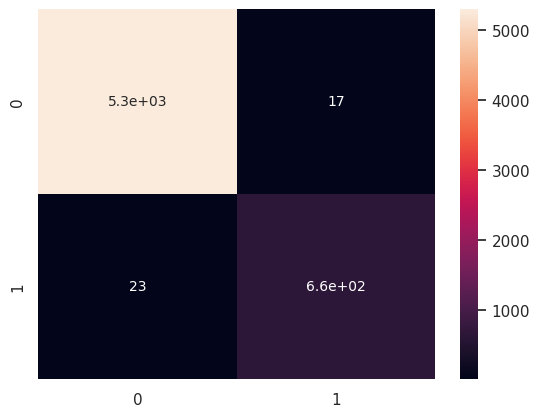

In [57]:
  ax=plt.axes()
  sns.heatmap(matrix1, annot=True,
                        annot_kws={'size':10},
                        ax=ax
                        )

In [58]:
#5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
model2 = GradientBoostingClassifier()
results2 = cross_val_score(model2, X, y, cv=kfold)
model2.fit(X_train, y_train)
predicted2 = model2.predict(X_test)
matrix2 = confusion_matrix(y_test, predicted2)
print(matrix2)

[[5157  164]
 [  36  643]]


In [61]:
report2 = classification_report(y_test, predicted2)
print(report2)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      5321
         1.0       0.80      0.95      0.87       679

    accuracy                           0.97      6000
   macro avg       0.89      0.96      0.92      6000
weighted avg       0.97      0.97      0.97      6000



<Axes: >

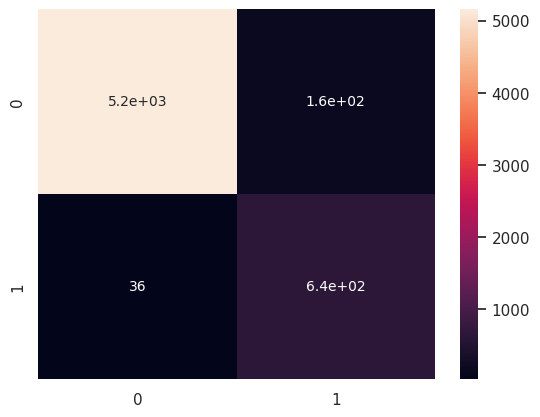

In [62]:
  ax=plt.axes()
  sns.heatmap(matrix2, annot=True,
                        annot_kws={'size':10},
                        ax=ax
                        )

In [63]:
#6.	Identify the best model and justify the evaluation metrics used.
#6.1.	Find the ROC/AUC for each model and plot the ROC curve.
#6.2.	Find the confusion matrix for each of the models.
#6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [77]:
#roc curve for models
fpr, tpr, thresh = roc_curve(y_test, predicted,  pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, predicted1, pos_label=1 )

fpr2, tpr2, thresh2 = roc_curve(y_test, predicted2, pos_label=1)


In [78]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [79]:
# auc scores
auc_score = roc_auc_score(y_test, predicted)
auc_score1 = roc_auc_score(y_test, predicted1)
auc_score2 = roc_auc_score(y_test, predicted2)

print(auc_score,auc_score1, auc_score2)

0.8825454426690144 0.9814658843346963 0.9580797900003848


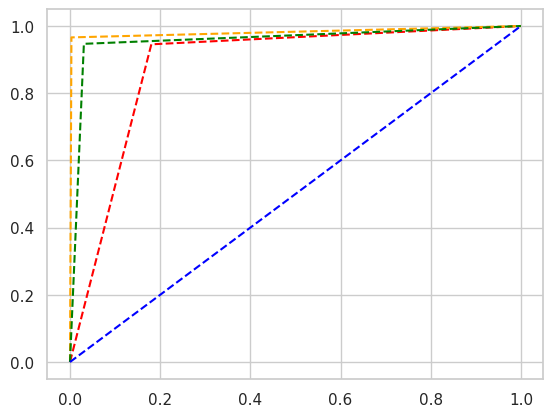

In [83]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='GBS')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

In [ ]:
#6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?

In [81]:
#Both are important, precision answers the question how many positive identifications are really correct and
#recall answers what proportion of actual positives was identified correctly. In some cases when recall increases precision decreases and vice versa. For that reason
#we pay more attention to the f1 score as a parameter to compare the models, it relies both in precision and recall!!
# No matter what, it seems that the Random Forest Classification has better AUC score as well as f1 score!

In [82]:
#7.	Suggest various retention strategies for targeted employees.
#7.1.	Using the best model, predict the probability of employee turnover in the test data.
#7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
#■	Safe Zone (Green) (Score < 20%)
#■	Low Risk Zone (Yellow) (20% < Score < 60%)
#■	Medium Risk Zone (Orange) (60% < Score < 90%)
#■	High Risk Zone (Red) (Score > 90%).


In [87]:
probability=model1.predict_proba(X_test)
probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [94]:
importances = model1.feature_importances_

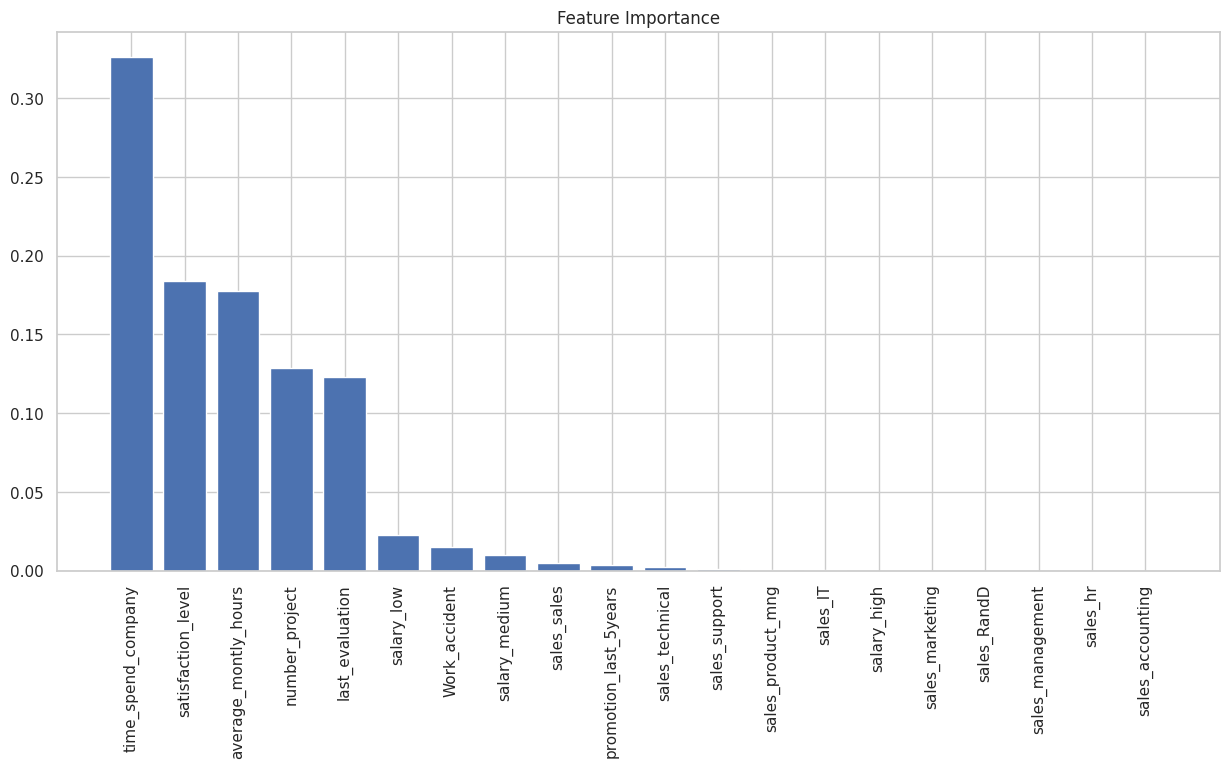

In [96]:
important_parameters = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in important_parameters] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[important_parameters]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot